In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from pyqg import qg_model
reload(qg_model)

<module 'pyqg.qg_model' from '/Users/rpa/RND/Public/pyqg/pyqg/qg_model.pyc'>

In [3]:
tmax = 104000000
dt = 8000

In [4]:
m = qg_model.QGModel(nx=64, tmax=tmax, dt=dt)
lpo = %lprun -r -f qg_model.QGModel._step_forward -f qg_model.QGModel._forward_timestep m.run()
lpo.print_stats()

# m = qg_model.QGModel(nx=64, tmax=tmax, dt=dt, use_fftw=True)
# lpo = %lprun -r -f qg_model.QGModel._step_forward m.run()
# lpo.print_stats()

t=         8000000, tc=      1000: cfl=0.012968, ke=0.000000327
t=        16000000, tc=      2000: cfl=0.012977, ke=0.000000721
t=        24000000, tc=      3000: cfl=0.013034, ke=0.000001903
t=        32000000, tc=      4000: cfl=0.013061, ke=0.000005591
t=        40000000, tc=      5000: cfl=0.015769, ke=0.000017384
t=        48000000, tc=      6000: cfl=0.026566, ke=0.000055697
t=        56000000, tc=      7000: cfl=0.049186, ke=0.000180548
t=        64000000, tc=      8000: cfl=0.069530, ke=0.000329086
t=        72000000, tc=      9000: cfl=0.093681, ke=0.000399990
t=        80000000, tc=     10000: cfl=0.096541, ke=0.000411198
t=        88000000, tc=     11000: cfl=0.097293, ke=0.000460295
t=        96000000, tc=     12000: cfl=0.096581, ke=0.000470322
 Timer unit: 1e-06 s

File: /Users/rpa/RND/Public/pyqg/pyqg/model.py
Function: _step_forward at line 136
Total time: 10.8871 s

Line #      Hits         Time  Per Hit   % Time  Line Contents
   136                                   

In [6]:
#tmax = 104000000
dt = 2000
tmax = 1000*dt

m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt)
lpo = %lprun -r -f qg_model.QGModel._step_forward m.run()
lpo.print_stats()

# m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, use_fftw=True)
# lpo = %lprun -r -f qg_model.QGModel._step_forward m.run()
# lpo.print_stats()

Inside Kernel
 Timer unit: 1e-06 s

File: /Users/rpa/RND/Public/pyqg/pyqg/model.py
Function: _step_forward at line 136
Total time: 69.0999 s

Line #      Hits         Time  Per Hit   % Time  Line Contents
   136                                               def _step_forward(self):
   137                                           
   138                                                   # the basic steps are
   139      1000         8656      8.7      0.0          self._print_status() 
   140                                           
   141      1000     21089675  21089.7     30.5          self._invert()
   142                                                   # find streamfunction from pv
   143                                           
   144                                                   #self._advection_tendency()
   145      1000     21633687  21633.7     31.3          self.dqhdt_adv = self._advection_tendency()
   146                                                   # use s

In [8]:
N = 512
a = np.random.rand(N,N)
b = np.random.rand(N,N)
out = np.empty_like(a)
%timeit c = a * b
%timeit c = np.multiply(a,b)
%timeit np.multiply(a, b, out)

1000 loops, best of 3: 418 µs per loop
1000 loops, best of 3: 428 µs per loop
1000 loops, best of 3: 383 µs per loop


In [9]:
%timeit np.multiply(a, b, a)

1000 loops, best of 3: 1.63 ms per loop


In [5]:
reload(qg_model)
m = qg_model.QGModel(nx=64, tmax=tmax, dt=dt)
lpo = %lprun -r -f qg_model.QGModel._step_forward -f qg_model.QGModel.advection_tendency m.run()
lpo.print_stats()

 Timer unit: 1e-06 s

File: /Users/rpa/RND/Public/pyqg/pyqg/qg_model.py
Function: _step_forward at line 334
Total time: 27.0935 s

Line #      Hits         Time  Per Hit   % Time  Line Contents
   334                                               def _step_forward(self):
   335                                           
   336                                                   # the basic steps are
   337                                                   
   338     13000      1305452    100.4      4.8          self.invert()
   339                                                   # find streamfunction from pv
   340                                                   
   341     13000     21300602   1638.5     78.6          self.advection_tendency()
   342                                                   # use streamfunction to calculate advection tendency
   343                                                   
   344     13000       230641     17.7      0.9          self.forcing_tend

## m.forcing_tendency()

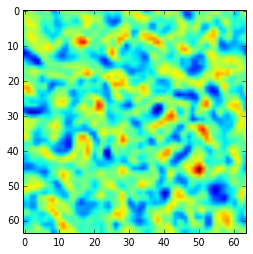

In [27]:
plt.imshow(m.q1)

In [21]:
(m.wv2 * m.ph2).shape

(64, 33)

In [32]:
q = np.array([m.q1, m.q2])
print q.shape
qf = m.fft2(q)
print qf.shape

(2, 64, 64)
(2, 64, 33)
